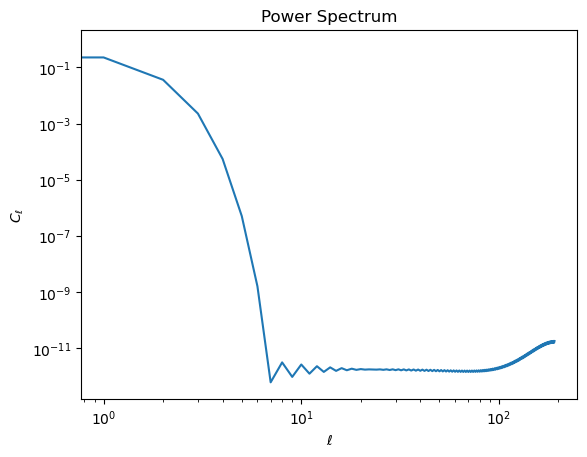

In [26]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

# Example: Simulate or provide a function on the sphere
nside = 64  # resolution
npix = hp.nside2npix(nside)

# Let's define a function on the sphere
# For example, a simple dipole: f(theta, phi) = cos(theta)
vecs = hp.pix2vec(nside, np.arange(npix))
f_map = np.exp(-np.arccos(vecs[2])**2)  # z component of the direction vector

# Spherical harmonic decomposition
alm = hp.map2alm(f_map)

# Power spectrum
cl = hp.alm2cl(alm)

# Plot power spectrum
plt.figure()
plt.plot(cl)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.title("Power Spectrum")
plt.savefig("Gaussian_c_l")
plt.show()


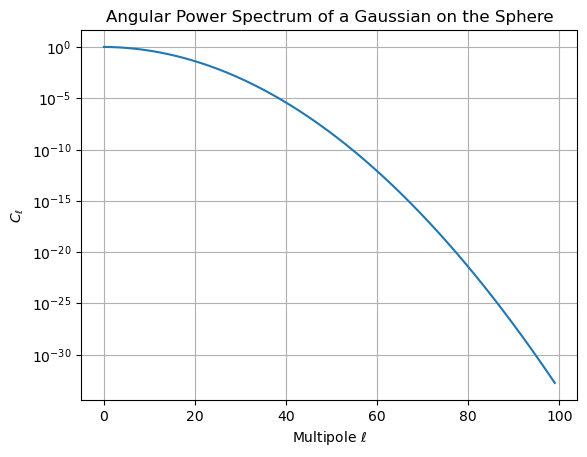

In [23]:
import numpy as np
import matplotlib.pyplot as plt

sigma = np.radians(5)  # 5 degree Gaussian beam
ells = np.arange(0, 100)
Cl = np.exp(-ells * (ells + 1) * sigma**2)

plt.semilogy(ells, Cl)
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_\ell$')
plt.title('Angular Power Spectrum of a Gaussian on the Sphere')
plt.grid(True)
plt.show()


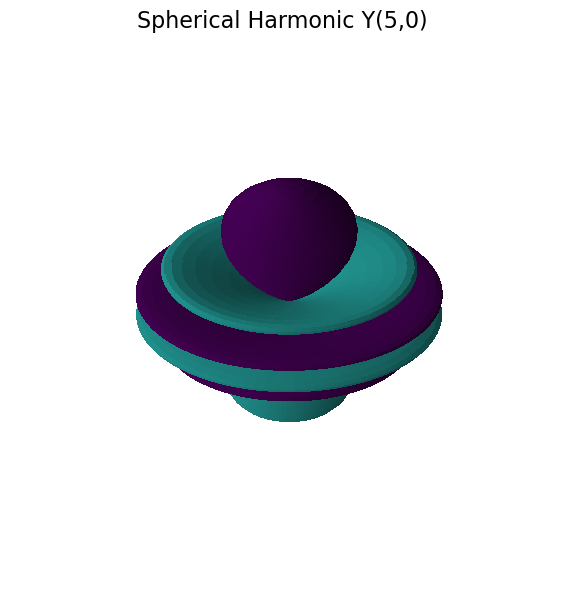

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

theta = np.linspace(0, np.pi, 100)      # polar angle
phi = np.linspace(0, 2*np.pi, 100)      # azimuthal angle
theta, phi = np.meshgrid(theta, phi)

l = 5   # degree
m = 0  # order
Ylm = sph_harm(m, l, phi, theta)

r = np.abs(Ylm)  # magnitude of Y_lm (or use np.real(Ylm) for signed value)
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=plt.cm.viridis(np.angle(Ylm) % (2*np.pi) / (2*np.pi)),
                rstride=1, cstride=1, linewidth=0, antialiased=False)

ax.set_title(f"Spherical Harmonic Y({l},{m})", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()



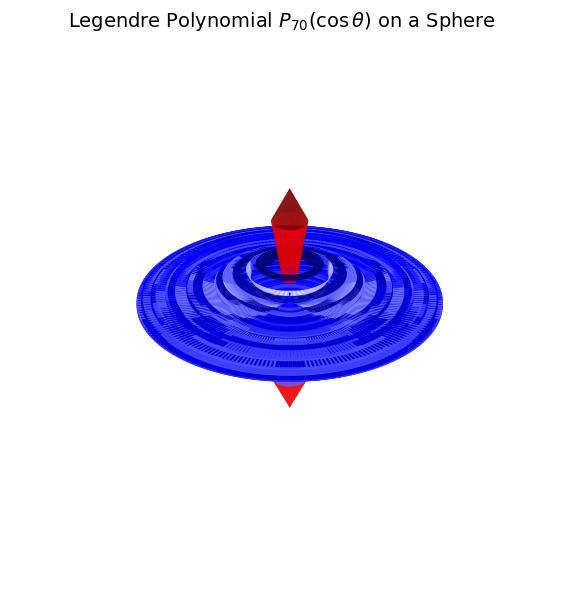

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import legendre

# Set degree ℓ
l = 70
P_l = legendre(l)  # Returns polynomial object

# Grid over θ and φ
theta = np.linspace(0, np.pi, 200)
phi = np.linspace(0, 2 * np.pi, 200)
theta, phi = np.meshgrid(theta, phi)

# Compute r(θ) = P_ℓ(cosθ)
r = P_l(np.cos(theta))  # axisymmetric: no φ-dependence

# Convert to 3D Cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', facecolors=plt.cm.seismic((r - r.min()) / (r.max() - r.min())),
                       rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_title(f'Legendre Polynomial $P_{{{l}}}(\\cos\\theta)$ on a Sphere', fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


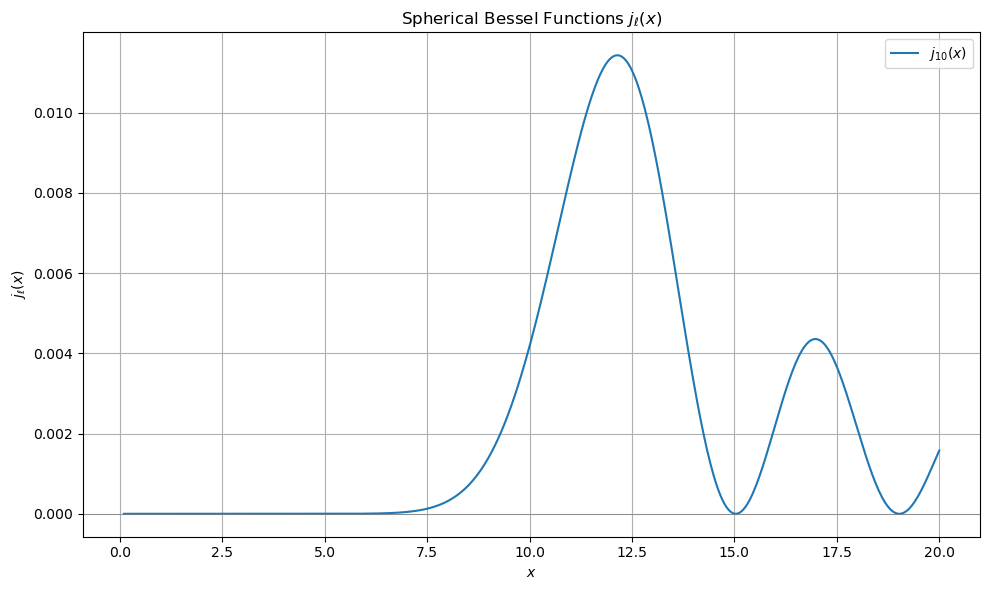

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn

# x range
x = np.linspace(0.1, 20, 500)

# Plot for several values of ℓ
ells = [10]

plt.figure(figsize=(10, 6))
for l in ells:
    plt.plot(x, np.abs(spherical_jn(l, x))**2, label=fr'$j_{{{l}}}(x)$')

plt.xlabel(r'$x$')
plt.ylabel(r'$j_\ell(x)$')
plt.title('Spherical Bessel Functions $j_\\ell(x)$')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


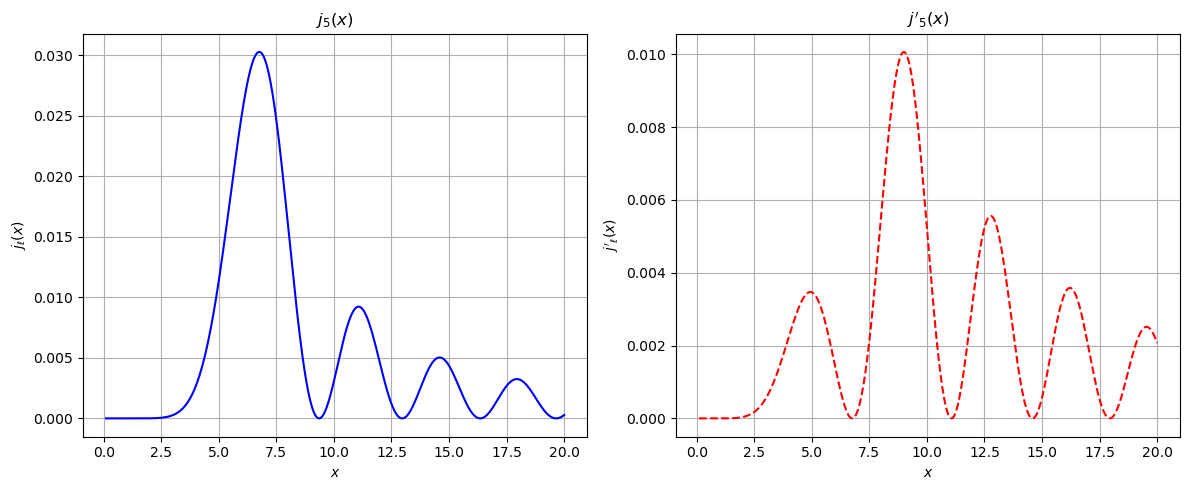

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn

x = np.linspace(0.1, 20, 500)
ell = 5

j_l = spherical_jn(ell, x)
j_l_prime = spherical_jn(ell, x, derivative=True)

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: j_l(x)
axs[0].plot(x, np.abs(j_l)**2, color='blue')
axs[0].set_title(fr'$j_{{{ell}}}(x)$')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$j_\ell(x)$')
axs[0].grid(True)

# Right plot: j'_l(x)
axs[1].plot(x, np.abs(j_l_prime)**2, color='red', linestyle='--')
axs[1].set_title(fr"$j'_{{{ell}}}(x)$")
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r"$j'_\ell(x)$")
axs[1].grid(True)

plt.tight_layout()
plt.show()
